In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', palette='dark', style='whitegrid')

In [3]:
df = pd.read_csv('/ZhouJohn/JupyterNoteBook/Data/ex1data1.txt',names=['population', 'profit'])
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
type()

SyntaxError: invalid token (<ipython-input-4-375522c844b2>, line 1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
df.shape

(97, 2)

In [5]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


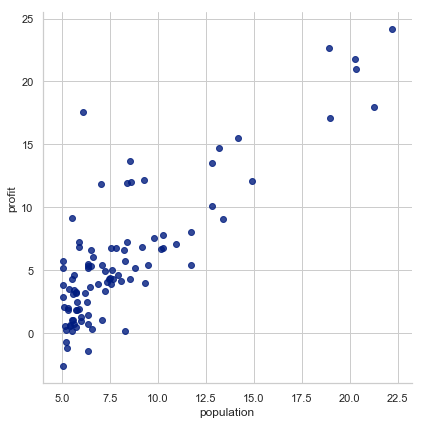

In [6]:
sns.lmplot('population', 'profit', df, height=6, fit_reg=False)

In [7]:
df.insert(0, 'Ones', 1)

In [8]:
df.head()

,Ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [9]:
cols = df.shape[1]  # shape 结果是一个元组
cols

3

In [10]:
X = df.iloc[:, 0:cols-1] # 不包含右端的值，iloc索引的是integer，loc索引的是label
X.head()

,Ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [11]:
y = df.iloc[:, cols-1:cols]
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [12]:
X = np.matrix(X.values)
y = np.matrix(y.values)


In [13]:
# 初始化θ值（自己假定的）

theta = np.matrix(np.array([0,0]))
# theta.ndim
theta.shape  # theta维度

(1, 2)

In [14]:
theta

matrix([[0, 0]])

In [15]:
# 创建以θ为参数的代建函数

def compute_cost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

计算代价函数 (theta初始值为0)

In [16]:
compute_cost(X, y, theta)  # 得到J(θ)的值,模型误差值最小

32.072733877455676

# batch gradient decent（批量梯度下降）

$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [64]:
# 定义梯度下降函数
def gradientDesvent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameter = int(theta.ravel().shape[1])
    # ravel()函数：将多维的数组降维至一维数组，返回的是视图，会改变原来的数组
    # flatten()函数同ravel函数功能一致，但flatten返回拷贝，不会改变原来的数组
    cost = np.zeros(iters)
    
    for i in range(iters):
        h = (X * theta.T) - y
        for j in range(parameter):
            item = np.multiply(h, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X) * np.sum(item))) 
        theta = temp
        cost[i] = compute_cost(X, y, theta)
    return theta, cost

In [65]:
# 初始化参数

alpha = 0.01
iters = 1000 # 迭代1000次


In [76]:
result, cost_result = gradientDesvent(X, y, theta, alpha, iters)
# print(g)
result

matrix([[-3.24140214,  1.1272942 ]])

使用我们拟合的参数计算训练模型的代价函数（误差）

In [77]:
compute_cost(X, y, result)

4.515955503078912

In [78]:
df.head()

,Ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


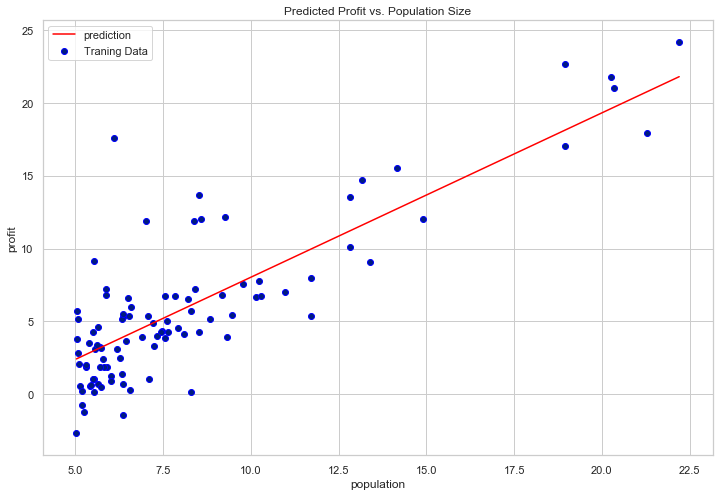

In [79]:
x = np.linspace(df.population.min(), df.population.max(), 100)
f = result[0, 0] + (result[0,1] * x)


fig, ax = plt.subplots(figsize=(12,8))   # figsize: 坐标的长和宽

ax.plot(x, f, 'red', label='prediction')
ax.scatter(df.population, df.profit, label='Traning Data',edgecolors='blue')  # 画散点图
ax.legend(loc=2)                                            # 图例,loc = 'upper left'
ax.set_xlabel('population')
ax.set_ylabel('profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

绘制梯度下降函数在每个训练迭代中输出一个代价向量

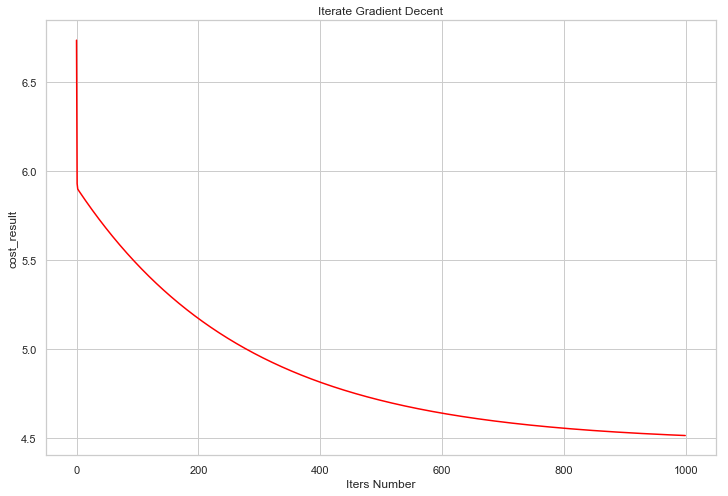

In [80]:
fig_1, ax_1 = plt.subplots(figsize=(12,8))
ax_1.plot(np.arange(iters), cost_result, 'red')
ax_1.set_xlabel('Iters Number')
ax_1.set_ylabel('cost_result')
ax_1.set_title('Iterate Gradient Decent')
plt.show()


Normal Equation 正规方程

In [81]:
# 使用正规方程计算得到的θ

def normalEqu(x, y):
    theta = np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y))
    # inverse 逆矩阵(inv())
    # \pinv()函数：伪逆矩阵 
    
    return theta
final_theta = normalEqu(X, y)
final_theta 

matrix([[-3.89578088],
        [ 1.19303364]])

In [83]:
result

matrix([[-3.24140214,  1.1272942 ]])

In [1]:
!python --version

Python 3.7.0
